<h1>Name:- Aniket E. Donode <br>
Roll no:- 202010023 <br>
Sub:- Data Mining (Lab)
</h1>

<hr></hr>
<h2>Aim:- Implement K means Clutering</h2>
<hr></hr>

# K means Clusteirng

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# import os
# current_directory = os.getcwd()
# print(current_directory) 

C:\Users\Aniket\Classification\Data set


In [2]:
customer=pd.read_csv(r'C:\Users\Aniket\Classification\Data set\Machine Learning\Data\customerspends.csv',index_col='Customer')

In [3]:
customer.head()

,Apparel,Beauty and Healthcare
Customer,,
1,21.10,0.7
2,15.23,5.5
3,5.22,18.6
4,31.10,1.8
5,6.12,21.5


C:\Users\Aniket\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


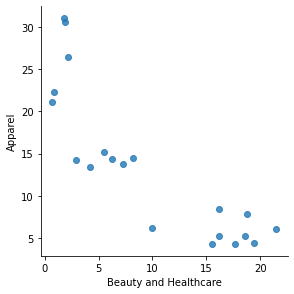

In [4]:
sns.lmplot(y="Apparel",x="Beauty and Healthcare",data=customer,fit_reg=False,size=4)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler=StandardScaler()
scaled_customer=scaler.fit_transform(customer[["Apparel",'Beauty and Healthcare']])
scaled_customer[:5]

array([[ 0.892371  , -1.26688022],
       [ 0.20647107, -0.59775334],
       [-0.96318111,  1.22840542],
       [ 2.06085469, -1.11353864],
       [-0.85801758,  1.63266957]])

In [7]:
scaled_customer

array([[ 0.892371  , -1.26688022],
       [ 0.20647107, -0.59775334],
       [-0.96318111,  1.22840542],
       [ 2.06085469, -1.11353864],
       [-0.85801758,  1.63266957],
       [ 0.12117176, -0.22136947],
       [-0.57991846,  0.89384198],
       [ 1.52335219, -1.05777807],
       [-1.06600768,  1.10294413],
       [ 0.03353548, -0.34683076],
       [-0.96551808,  0.89384198],
       [ 0.08611725, -0.96019707],
       [-1.05899677,  1.33992657],
       [-1.07652403,  0.79626098],
       [ 1.03258904, -1.23899993],
       [-0.65002748,  1.25628571],
       [-0.00736145, -0.7789752 ],
       [ 2.00243051, -1.0995985 ],
       [ 0.10948692, -0.48902022],
       [-0.84282729,  0.02676507]])

In [8]:
from sklearn.cluster import KMeans
clusters=KMeans(3)
clusters.fit(customer)

KMeans(n_clusters=3)

In [9]:
customer['cluster_id']=clusters.labels_

In [10]:
customer[:5]


,Apparel,Beauty and Healthcare,cluster_id
Customer,,,
1,21.10,0.7,2
2,15.23,5.5,0
3,5.22,18.6,1
4,31.10,1.8,2
5,6.12,21.5,1


In [11]:
customer.head()

,Apparel,Beauty and Healthcare,cluster_id
Customer,,,
1,21.10,0.7,2
2,15.23,5.5,0
3,5.22,18.6,1
4,31.10,1.8,2
5,6.12,21.5,1


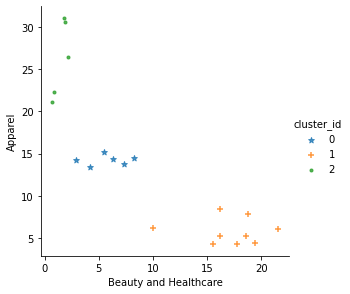

In [12]:
markers=['*','+','.']
sns.lmplot(y="Apparel",x="Beauty and Healthcare",data=customer,hue='cluster_id',markers=markers,fit_reg=False,height=4)

In [14]:
scaled_customer

array([[ 0.892371  , -1.26688022],
       [ 0.20647107, -0.59775334],
       [-0.96318111,  1.22840542],
       [ 2.06085469, -1.11353864],
       [-0.85801758,  1.63266957],
       [ 0.12117176, -0.22136947],
       [-0.57991846,  0.89384198],
       [ 1.52335219, -1.05777807],
       [-1.06600768,  1.10294413],
       [ 0.03353548, -0.34683076],
       [-0.96551808,  0.89384198],
       [ 0.08611725, -0.96019707],
       [-1.05899677,  1.33992657],
       [-1.07652403,  0.79626098],
       [ 1.03258904, -1.23899993],
       [-0.65002748,  1.25628571],
       [-0.00736145, -0.7789752 ],
       [ 2.00243051, -1.0995985 ],
       [ 0.10948692, -0.48902022],
       [-0.84282729,  0.02676507]])

In [15]:
cluster_new=KMeans(3,random_state=42)
cluster_new.fit(scaled_customer)
customer["cluser_id_new"]=cluster_new.labels_

In [16]:
customer.head()

,Apparel,Beauty and Healthcare,cluster_id,cluser_id_new
Customer,,,,
1,21.10,0.7,2,2
2,15.23,5.5,0,0
3,5.22,18.6,1,1
4,31.10,1.8,2,2
5,6.12,21.5,1,1


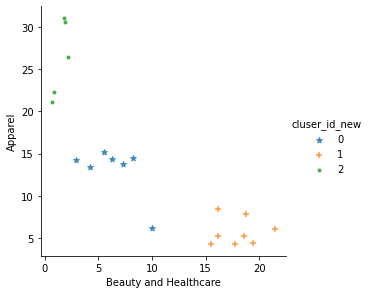

In [17]:
markers=['*','+','.']
sns.lmplot(y="Apparel",x="Beauty and Healthcare",data=customer,hue='cluser_id_new',markers=markers,fit_reg=False,height=4)

<h1>Dendogram</h1>

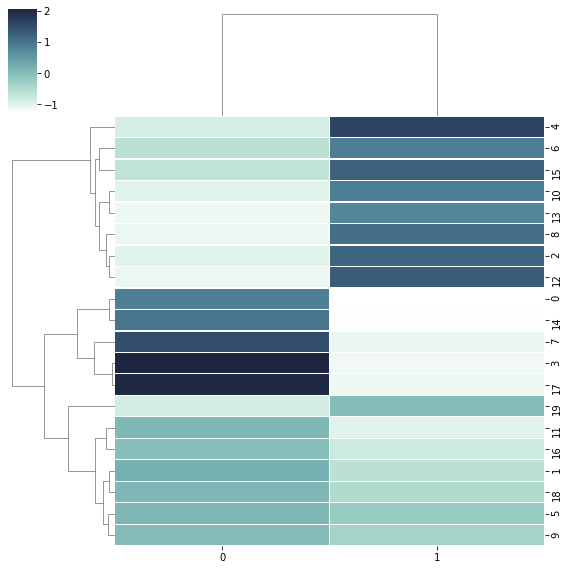

In [18]:
cmap=sns.cubehelix_palette(as_cmap=True,rot=-.3,light=1)
sns.clustermap(scaled_customer,cmap=cmap,linewidth=.2,figsize=(8,8))

<h1>Elbow Method To find Clusters</h1>

C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


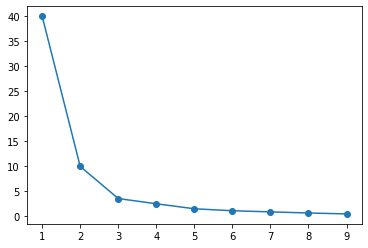

In [19]:
cluster_range=range(1,10)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(scaled_customer)
    cluster_errors.append(clusters.inertia_)
plt.figure(figsize=(6,4))
plt.plot(cluster_range,cluster_errors,marker='o');